In [1]:
%env KMP_DUPLICATE_LIB_OK=TRUE

env: KMP_DUPLICATE_LIB_OK=TRUE


In [2]:
!echo $KMP_DUPLICATE_LIB_OK

TRUE


In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import torch

from precipitation.data.data_module import PrecipitationDataModule

import matplotlib.pyplot as plt
 
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import cartopy.crs as ccrs

/Users/gkoehler/miniconda3/envs/precip/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data = PrecipitationDataModule(feature_set='v1+time')

In [5]:
data.setup('fit')

In [6]:
data.train_data.shape

torch.Size([3654, 10, 19, 61])

In [7]:
data.train_target.shape

torch.Size([3654, 19, 61])

In [19]:
log_data = np.log(data.train_target.numpy() + 0.01)

In [20]:
np.max(log_data)

6.1382422

In [21]:
np.min(log_data)

-4.6051702

In [22]:
inv_transform_data = np.exp(log_data) - 0.01

In [23]:
np.allclose(data.train_target.numpy(), inv_transform_data)

True

(array([2.957228e+06, 2.389730e+05, 1.497630e+05, 1.109100e+05,
        8.803200e+04, 7.299000e+04, 6.261500e+04, 5.367000e+04,
        4.640800e+04, 4.110700e+04, 3.635700e+04, 3.276500e+04,
        2.909600e+04, 2.593600e+04, 2.331500e+04, 2.101400e+04,
        1.888300e+04, 1.753800e+04, 1.577400e+04, 1.433600e+04,
        1.286100e+04, 1.187200e+04, 1.094200e+04, 1.013300e+04,
        9.223000e+03, 8.324000e+03, 7.814000e+03, 6.943000e+03,
        6.340000e+03, 5.887000e+03, 5.526000e+03, 5.130000e+03,
        4.776000e+03, 4.384000e+03, 4.129000e+03, 3.664000e+03,
        3.641000e+03, 3.337000e+03, 3.016000e+03, 2.714000e+03,
        2.518000e+03, 2.480000e+03, 2.262000e+03, 2.232000e+03,
        2.054000e+03, 1.871000e+03, 1.726000e+03, 1.622000e+03,
        1.523000e+03, 1.444000e+03, 1.304000e+03, 1.258000e+03,
        1.205000e+03, 1.110000e+03, 9.680000e+02, 1.006000e+03,
        8.650000e+02, 8.930000e+02, 8.240000e+02, 7.880000e+02,
        7.280000e+02, 7.120000e+02, 6.26

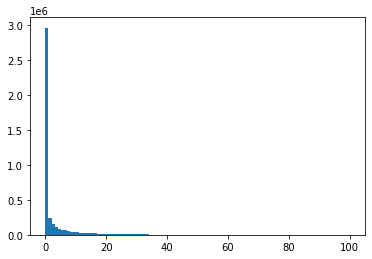

In [24]:
plt.hist(x=data.train_target.flatten().numpy(), range=[0, 100], bins=100)

(array([1.374214e+06, 1.142370e+05, 7.777300e+04, 6.139300e+04,
        5.191800e+04, 4.628200e+04, 4.221400e+04, 3.937700e+04,
        3.744800e+04, 3.572200e+04, 3.454400e+04, 3.371400e+04,
        3.297500e+04, 3.260300e+04, 3.158300e+04, 3.136000e+04,
        3.129100e+04, 3.121400e+04, 3.134100e+04, 3.107800e+04,
        3.103100e+04, 3.108400e+04, 3.123800e+04, 3.118800e+04,
        3.151900e+04, 3.140800e+04, 3.195600e+04, 3.211800e+04,
        3.217000e+04, 3.212100e+04, 3.238000e+04, 3.278500e+04,
        3.286600e+04, 3.304200e+04, 3.332100e+04, 3.348200e+04,
        3.391400e+04, 3.425200e+04, 3.416500e+04, 3.495700e+04,
        3.502900e+04, 3.501800e+04, 3.543700e+04, 3.618000e+04,
        3.620400e+04, 3.689200e+04, 3.762000e+04, 3.789800e+04,
        3.827500e+04, 3.910900e+04, 3.947500e+04, 4.010300e+04,
        4.046600e+04, 4.110700e+04, 4.162500e+04, 4.181400e+04,
        4.244900e+04, 4.266600e+04, 4.309900e+04, 4.355000e+04,
        4.361600e+04, 4.319200e+04, 4.27

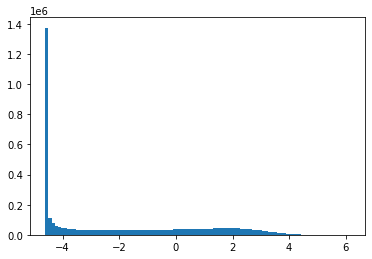

In [25]:
plt.hist(x=np.log(data.train_target.flatten().numpy() + 0.01), bins=100)